# Packages importing

In [1]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

from gensim.test.utils import get_tmpfile
from gensim.models import word2vec

2018-09-05 20:53:52,876 : INFO : 'pattern' package not found; tag filters are not available for English
2018-09-05 20:53:52,888 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-09-05 20:53:52,889 : INFO : built Dictionary(12 unique tokens: ['graph', 'survey', 'user', 'time', 'trees']...) from 9 documents (total 29 corpus positions)


# Model training

In [2]:
# Open data file
file = open('./dataset/yes_i2v/train2.txt','r')
playlists = word2vec.LineSentence(file)

#
path = get_tmpfile("item2vec.model")
    
# Modelling
model = word2vec.Word2Vec(playlists, sg=1, min_count=1, window=3, size=100)
model.save("item2vec.model")

file.close()

2018-09-05 20:54:22,777 : INFO : collecting all words and their counts
2018-09-05 20:54:22,791 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-09-05 20:54:22,830 : INFO : PROGRESS: at sentence #10000, processed 63920 words, keeping 3151 word types
2018-09-05 20:54:22,860 : INFO : PROGRESS: at sentence #20000, processed 129243 words, keeping 3167 word types
2018-09-05 20:54:22,889 : INFO : PROGRESS: at sentence #30000, processed 187038 words, keeping 3167 word types
2018-09-05 20:54:22,923 : INFO : PROGRESS: at sentence #40000, processed 242147 words, keeping 3167 word types
2018-09-05 20:54:22,951 : INFO : PROGRESS: at sentence #50000, processed 309108 words, keeping 3167 word types
2018-09-05 20:54:22,987 : INFO : PROGRESS: at sentence #60000, processed 378158 words, keeping 3167 word types
2018-09-05 20:54:23,019 : INFO : PROGRESS: at sentence #70000, processed 443365 words, keeping 3167 word types
2018-09-05 20:54:23,049 : INFO : PROGRESS: at sentence

# Getting similar items by name

In [3]:
model.wv.similar_by_word('318', topn =5)

2018-09-05 20:54:40,783 : INFO : precomputing L2-norms of word weight vectors
d:\development\anaconda3\envs\tensorflow\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('910', 0.9646040201187134),
 ('249', 0.9622789621353149),
 ('374', 0.9574146270751953),
 ('253', 0.9537431001663208),
 ('292', 0.9536535739898682)]

# t-SNE

In [4]:
from sklearn.manifold import TSNE
import pandas as pd

vocab = list(model.wv.vocab)
X = model[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])
print(df.head())

d:\development\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


              x          y
683  -20.904629  45.144211
333   46.501816  15.423865
436   39.842964 -11.078094
1614  53.093281 -11.509270
2116  15.883546 -47.055584


In [5]:
# Representative points
# Guns'n rose
df2 = df.loc[['318', '253','910']]
print(df2)
# Usher
df3 = df.loc[['3', '1669','2779']]


             x          y
318  47.865318   8.520836
253  48.510441  11.439242
910  48.700752   8.580322


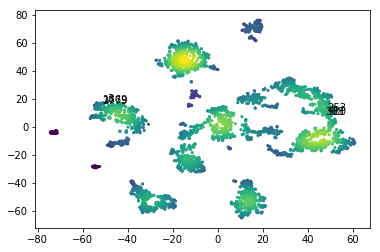

In [7]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = df['x']
y = df['y']

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Plot a scatter
ax.scatter(x, y, c=z, s=10, edgecolor='')

# Show annotating of items in df2
for word, pos in df2.iterrows():
    ax.annotate(word, pos)
for word, pos in df3.iterrows():
    ax.annotate(word, pos)
    
plt.show()

# Use of genre data

In [12]:
# 
import pandas as pd

df_sum = pd.read_table("./dataset/yes_i2v/summary.txt", delimiter='\t', header=None, names=('Num', 'Music Name', 'Artist', 'Tags'))
print(df_sum.head(),'\n')

# Print similiraties by number of music
def print_simi(music_num):
    simi_list = model.wv.similar_by_word(str(music_num), topn =5)
    print("Searching Music: ",music_num, '\t',df_sum.iat[music_num, 1], '\t',df_sum.iat[music_num, 2], "\n")
    for l in simi_list:
        print("Similar Music: ", df_sum.iat[int(l[0]), 1], '\t',df_sum.iat[int(l[0]), 2])
        print(l)

        
print_simi(1040)
        

   Num                                         Music Name      Artist  \
0    0                       Gucci Time (w\/ Swizz Beatz)  Gucci Mane   
1    1  Aston Martin Music (w\/ Drake & Chrisette Mich...   Rick Ross   
2    2                      Get Back Up (w\/ Chris Brown)        T.I.   
3    3                 Hot Toddy (w\/ Jay-Z & Ester Dean)       Usher   
4    4                                       Whip My Hair      Willow   

                                             Tags  
0                                         115 173  
1      14 27 62 88 90 110 115 123 155 173 190 214  
2                                         115 173  
3                                        2 72 173  
4  2 6 24 52 62 72 88 107 115 126 141 155 173 190   

Searching Music:  1040 	 Three Little Birds 	 Bob Marley & The Wailers 

Similar Music:  Is This Love? 	 Bob Marley & The Wailers
('1099', 0.9869982004165649)
Similar Music:  Buffalo Soldier 	 Bob Marley & The Wailers
('1083', 0.9839478135108948)


d:\development\anaconda3\envs\tensorflow\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [9]:
from collections import Counter

df_tag = pd.read_table("./dataset/yes_small/tag_hash.txt", delimiter=',', header=None, names=('Num', 'Tag'))

# Get tags of all of five similar musics
def get_tags(music_num):
    simi_list = model.wv.similar_by_word(str(music_num), topn =5)
    tags = []
    for l in simi_list:
        tags_str = df_sum.iat[int(l[0]), 3]
        tags_list = tags_str.split()
        for i in tags_list:
            tags.append(i)
    return(tags)
    
print(get_tags(8),'\n')

# Get top n of common tags in five similar musics
def top_n_tags(music_num, topn=3):
    tags = get_tags(music_num)
    tags_counts = Counter(tags)
    top_n = tags_counts.most_common(topn)
    top_n_tag_name = []
    for i in top_n:
        top_n_tag_name.append(df_tag.iat[int(i[0]),1])
#         print(df_tag.iat[int(i[0]),1])
#     for j in top_n:
#         times.append(j[1])
    return top_n, top_n_tag_name

print(top_n_tags(8,topn=4))  
top_n_tags(8)

['88', '50', '62', '72', '88', '90', '98', '115', '115', '173', '115', '6', '52', '56', '62', '66', '98', '106', '115', '148', '173'] 

([('115', 4), ('173', 2), ('62', 2), ('88', 2)], [' wjlb-fm', ' whtd-fm', ' rnb', ' hip hop'])


d:\development\anaconda3\envs\tensorflow\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


([('115', 4), ('173', 2), ('62', 2)], [' wjlb-fm', ' whtd-fm', ' rnb'])

In [15]:
def genre_of_simis(music_num):
    print_simi(music_num)
    print('\n')
    print("Top N common tags: ",top_n_tags(music_num)[1])
    times = []
    for i in top_n_tags(music_num)[0]:
        times.append(i[1])
    print("Appearance times of common tags: ", times,'\n')
    
    
genre_of_simis(32)

Searching Music:  32 	 Boom Boom Pow 	 Black Eyed Peas 

Similar Music:  Sweet Dreams 	 Beyonce
('1678', 0.9812947511672974)
Similar Music:  Replay 	 Sean Kingston
('1677', 0.9747378826141357)
Similar Music:  Sexy Chick (w\/ Akon) 	 David Guetta
('1694', 0.9737188816070557)
Similar Music:  Whatcha Say 	 Jason DeRulo
('71', 0.9686710834503174)
Similar Music:  Telephone (w\/ Beyonce) 	 Lady Gaga
('1693', 0.9615379571914673)


Top N common tags:  [' rnb', ' pop', ' catchy']
Appearance times of common tags:  [5, 4, 4] 



d:\development\anaconda3\envs\tensorflow\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


## Comparing rec-music's tags with searching-music's tags

In [11]:
def cal_common_tags(music_num):
    tags_str = df_sum.iat[music_num, 3]
    tags_list = tags_str.split()
    list_a = []
    for i in tags_list:
        list_a.append(i)
#     print(list_a)
    #
    list_b = []
    top_n = top_n_tags(music_num, topn=5)[0]
    for j in top_n:
        list_b.append(j[0])
#     print(list_b,'\n')
    #
    result = list(set(list_a) & set(list_b))
    if len(result):    # not empty
#         print(result)
#         print('true')
        return 1
    else:
#         print('false')
        return 0
        

def cal_acc():
    tf_list = []
    for i in range(0, 2015):
#         print(i)
        tf_list.append(cal_common_tags(i))
    for j in range(2016, 3167):
#         print(j)
        tf_list.append(cal_common_tags(j))
    total = len(tf_list)
    right_count =[]
    for i in tf_list:
        if i ==1:
            right_count.append(i)
    right = len(right_count)
    print(right/total)

    
cal_acc()

d:\development\anaconda3\envs\tensorflow\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.9055590650663298
